## Visualization 5: Relationship between NBA Player of the Week and Team Location

Note: This notebook requires `maps` and `mapdata` which could be installed by running `install.packages(c("maps", "mapdata"))` in R

Note: This notebook requires `ggnewscale` which could be installed by running `devtools::install_github("eliocamp/ggnewscale")` in R

Note: This notebook requires `us` which could be installed by running `pip install us` in Python

In [1]:
%load_ext rpy2.ipython
%R library(ggplot2)
%R library(maps)
%R library(mapdata)
%R library(ggnewscale)

import pandas as pd
import numpy as np
import us
from utils import pd2r

In [2]:
location = pd2r(pd.read_csv('../data/scraped/NBA_Location.csv'))
nba_Abb = pd.read_csv('../data/scraped/NBA_Teams_Abb.csv')

In [3]:
# Add Abbreviation for the team
location_w_abb = (pd.merge(location, nba_Abb, left_on = 'Team', right_on = 'Franchise', how = 'left').drop(columns = 'Franchise'))
location_w_abb = location_w_abb.rename(columns = {'Abbreviation/Acronym':'Abb'})
location_w_abb.head()

,Division,Team,"City, State",Arena,Capacity,Coordinates,Founded,Joined,latitude,longitude,Abb
0,Atlantic,Boston Celtics,"Boston, Massachusetts",TD Garden,18624,﻿42.366303°N 71.062228°W,1946,1946,42.366303,-71.062228,BOS
1,Atlantic,Brooklyn Nets,"New York City, New York",Barclays Center,17732,﻿40.68265°N 73.974689°W,1967*,1976,41.000000,-75.000000,BKN
2,Atlantic,New York Knicks,"New York City, New York",Madison Square Garden,19812,﻿40.750556°N 73.993611°W,1946,1946,40.750556,-73.993611,NYK
3,Atlantic,Philadelphia 76ers,"Philadelphia, Pennsylvania",Wells Fargo Center,21600,﻿39.901111°N 75.171944°W,1946*,1949,39.901111,-75.171944,PHI
4,Atlantic,Toronto Raptors,"Toronto, Ontario",Scotiabank Arena,19800,﻿43.643333°N 79.379167°W,1995,1995,43.643333,-79.379167,TOR


In [4]:
potw = pd.read_csv('../data/raw/NBA_Player_of_the_Week.csv')
potw = potw.loc[potw['Season short'] > 1990]

In [5]:
potw_count = potw.groupby('Team').count()['Player'].reset_index()
location_new = location_w_abb[['Team','latitude','longitude','Abb']]
potw_count.loc[potw_count.Team == 'Philadelphia Sixers', 'Team'] = 'Philadelphia 76ers'

In [6]:
loc_potw_ct = pd.merge(location_new,potw_count, on = 'Team', how = 'left')
loc_potw_ct.head()

,Team,latitude,longitude,Abb,Player
0,Boston Celtics,42.366303,-71.062228,BOS,34
1,Brooklyn Nets,41.000000,-75.000000,BKN,6
2,New York Knicks,40.750556,-73.993611,NYK,30
3,Philadelphia 76ers,39.901111,-75.171944,PHI,32
4,Toronto Raptors,43.643333,-79.379167,TOR,34


In [7]:
nba_colors = pd.read_csv('../data/scraped/NBA_Teams_Color.csv')

In [8]:
nba_df = pd.merge(loc_potw_ct, nba_colors, left_on = 'Team', right_on = 'Franchise', how = 'left')
nba_colors = nba_df.set_index('Team')
nba_ggplot_fill = nba_colors['Color1']
nba_ggplot_color = nba_colors['Color2']
nba_df.head()

,Team,latitude,longitude,Abb,Player,Franchise,Tm,Color1,Color2
0,Boston Celtics,42.366303,-71.062228,BOS,34,Boston Celtics,BOS,#007A33,#BA9653
1,Brooklyn Nets,41.000000,-75.000000,BKN,6,Brooklyn Nets,BKN,#000000,#000000
2,New York Knicks,40.750556,-73.993611,NYK,30,New York Knicks,NYK,#006BB6,#F58426
3,Philadelphia 76ers,39.901111,-75.171944,PHI,32,Philadelphia 76ers,PHI,#006BB6,#ED174C
4,Toronto Raptors,43.643333,-79.379167,TOR,34,Toronto Raptors,TOR,#CE1141,#000000


In [9]:
states = np.array([state.name.lower() for state in us.states.STATES])
print(states)
region = location_w_abb.copy()[['Division', 'City, State']]
region['State'] = region['City, State'].str.split(', ').str[1].str.lower()
region.loc[region.State == 'd.c.', 'State'] = 'district of columbia'
region = region.drop(columns = ['City, State']).drop_duplicates()
#TODO: Assign color to each division and Join with states and fill na with gray
region

['alabama' 'alaska' 'arizona' 'arkansas' 'california' 'colorado'
 'connecticut' 'delaware' 'district of columbia' 'florida' 'georgia'
 'hawaii' 'idaho' 'illinois' 'indiana' 'iowa' 'kansas' 'kentucky'
 'louisiana' 'maine' 'maryland' 'massachusetts' 'michigan' 'minnesota'
 'mississippi' 'missouri' 'montana' 'nebraska' 'nevada' 'new hampshire'
 'new jersey' 'new mexico' 'new york' 'north carolina' 'north dakota'
 'ohio' 'oklahoma' 'oregon' 'pennsylvania' 'rhode island' 'south carolina'
 'south dakota' 'tennessee' 'texas' 'utah' 'vermont' 'virginia'
 'washington' 'west virginia' 'wisconsin' 'wyoming']


,Division,State
0,Atlantic,massachusetts
1,Atlantic,new york
3,Atlantic,pennsylvania
4,Atlantic,ontario
5,Central,illinois
6,Central,ohio
7,Central,michigan
8,Central,indiana
9,Central,wisconsin
10,Southeast,georgia


In [10]:
%R -i nba_df
%R -i nba_ggplot_color
%R -i nba_ggplot_fill

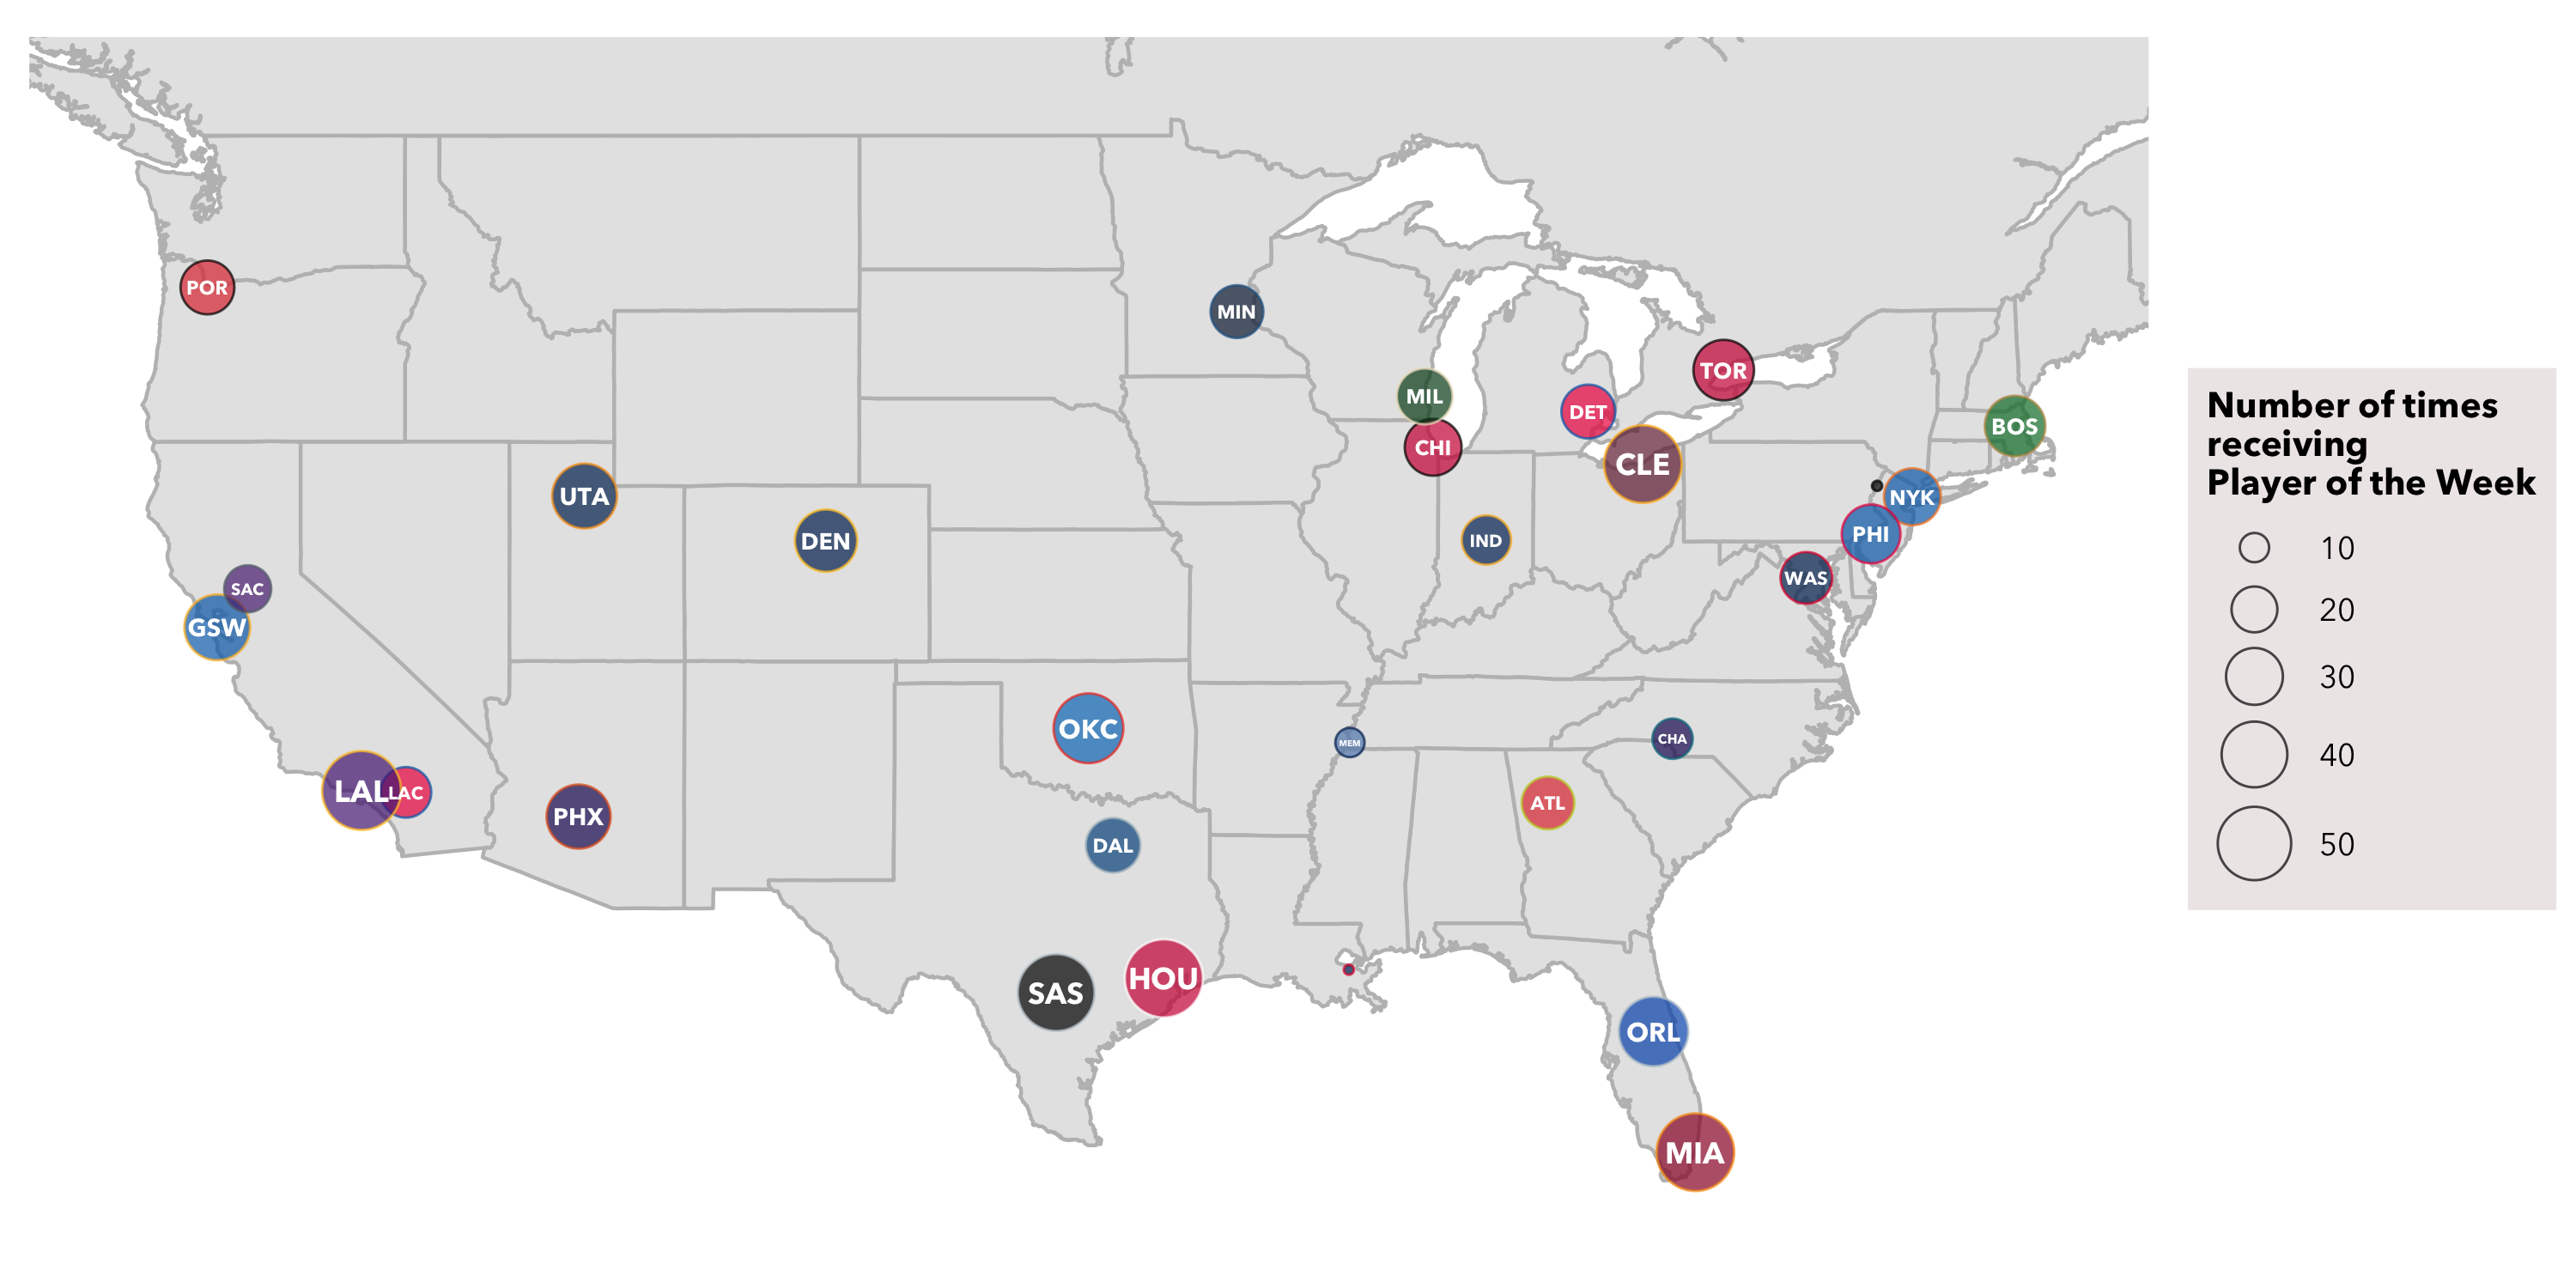

In [11]:
%%R -w 10 -h 5 --units in -r 300
usa <- map_data('state')
canada <- map_data('worldHires', 'Canada')

ggplot() +
geom_polygon(data = usa, aes(x = long, y = lat, group = group),
             fill = 'gray90', color = 'gray', size = 0.5) +
geom_polygon(data = canada, aes(x = long, y = lat, group = group),
             fill = 'grey90', color = 'gray', size = 0.5) +
geom_point(data = nba_df, aes(x = longitude, y = latitude, size = Player, color = Team, fill = Team),
           shape = 21, alpha = 0.7) +
scale_size(name = 'Number of times\nreceiving\nPlayer of the Week', range = c(1, 10)) +
new_scale('size') +
geom_text(data = nba_df, aes(x = longitude, y = latitude, label = Abb, size = Player), 
          family = 'Avenir Next', fontface = 'bold', color = 'white') +
scale_size(range = c(0, 3)) +
# geom_label(data = nba_df, aes(x = longitude, y = latitude, label = Abb, color = Team, fill = Team), alpha = 0.8, size = 2,position = 'dodge') +
scale_color_manual(values = nba_ggplot_color) +
scale_fill_manual(values = nba_ggplot_fill) +
coord_fixed(xlim = c(-125, -70), ylim = c(25, 50), ratio = 1.25) +
theme_minimal() +
theme(text = element_text(family = 'Avenir Next'),
      axis.text = element_blank(),
      axis.line = element_blank(),
      axis.ticks = element_blank(),
      panel.border = element_blank(),
      panel.grid = element_blank(),
      axis.title = element_blank(),
      legend.title = element_text(face = 'bold', size = 10),
      legend.position = 'right',
      legend.background = element_rect(size = 0, fill = 'snow2')) +
guides(fill = F, color = F, size = F, size = F, shape = F)

# ggsave('../vis/vis5.png', units = 'in', width = 10, height = 5)